In [78]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import coremltools
%matplotlib inline

In [2]:
weather_data = pd.read_csv("180703_weather_data.csv")

In [3]:
weather_data.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,FMTM,FRGT,FRTH,GAHT,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
0,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Replacing Nans

In [4]:
#finding means
max_temp_mean = weather_data["TMAX"].mean()
min_temp_mean = weather_data["TMIN"].mean()
prcp_mean = weather_data["PRCP"].mean()
percent_sun_mean = weather_data["PSUN"].mean()
snow_mean = weather_data["SNOW"].mean()
snow_depth_mean = weather_data["SNWD"].mean()
daily_sun_mean = weather_data["TSUN"].mean()
peak_wind_mean = weather_data["WDFG"].mean()
two_min_wind_mean = weather_data["WDF2"].mean()
five_min_wind_mean = weather_data["WDF5"].mean()
total_cloud_mean = weather_data["ACMH"].mean()
sun_cloud_mean = weather_data["ACSH"].mean()
wind_speed_mean = weather_data["AWND"].mean()

In [5]:
#replacing nans with means
weather_data["TMAX"] = weather_data["TMAX"].fillna(max_temp_mean)
weather_data["TMIN"] = weather_data["TMIN"].fillna(min_temp_mean)
weather_data["PRCP"] = weather_data["PRCP"].fillna(prcp_mean)
weather_data["PSUN"] = weather_data["PSUN"].fillna(percent_sun_mean)
weather_data["SNOW"] = weather_data["SNOW"].fillna(snow_mean)
weather_data["SNWD"] = weather_data["SNWD"].fillna(snow_depth_mean)
weather_data["TSUN"] = weather_data["TSUN"].fillna(daily_sun_mean)
weather_data["WDFG"] = weather_data["WDFG"].fillna(peak_wind_mean)
weather_data["WDF2"] = weather_data["WDF2"].fillna(two_min_wind_mean)
weather_data["WDF5"] = weather_data["WDF5"].fillna(five_min_wind_mean)
weather_data["ACMH"] = weather_data["ACMH"].fillna(total_cloud_mean)
weather_data["ACSH"] = weather_data["ACSH"].fillna(sun_cloud_mean)
weather_data["AWND"] = weather_data["AWND"].fillna(wind_speed_mean)

In [6]:
#splitting up the date
weather_data[["Year", "Month", "Day"]] = weather_data["DATE"].str.split("-",  expand=True)


# Dropping Columns

In [7]:
#data = weather_data.drop(['STATION', 'NAME', 'DATE'], axis = 1)
#data = weather_data.drop(['FMTM', 'FRGT', 'FRTH', 'GAHT', 'PGTM'], axis = 1)
#data = weather_data.drop(['TAVG', 'TOBS', 'WDF1', 'WDFM', 'WESD'], axis = 1)
#data = weather_data.drop(['WSF1', 'WSF2', 'WDF5', 'WSFG', 'WSFM'], axis = 1)
#data = weather_data.drop(['WT01', 'WT02', 'WT03', 'WT04', 'WT05'], axis = 1)
#data = weather_data.drop(['WT06', 'WT07', 'WT08', 'WT09', 'WT10'], axis = 1)
#data = weather_data.drop(['WT11', 'WT13', 'WT14', 'WT15'], axis = 1)
#data = weather_data.drop(['WT16', 'WT17', 'WT18', 'WT18', 'WT19'], axis = 1)
#data = weather_data.drop(['WT21', 'WT22', 'WV20'], axis = 1)
#data = weather_data.drop(['PSUN', 'SNOW', 'SNWD', 'TSUN', 'WDFG', 'WDF2'], axis = 1)
#data = weather_data.drop(['WDF5', 'ACMH', 'ACSH', 'AWND'], axis = 1)
data = weather_data[['TMAX', 'TMIN', 'PRCP', 'Year', "Month", "Day"]]

In [8]:
data.head(n=100)

,TMAX,TMIN,PRCP,Year,Month,Day
0,27,22,0.00,1940,01,01
1,27,16,0.00,1940,01,02
2,31,15,0.00,1940,01,03
3,37,25,0.00,1940,01,04
4,29,15,0.00,1940,01,05
5,34,16,0.08,1940,01,06
6,34,29,0.00,1940,01,07
7,29,19,0.00,1940,01,08
8,41,15,0.00,1940,01,09
9,45,35,0.78,1940,01,10


# One-hot Encoding

In [9]:
encoded_data = pd.get_dummies(data[['Day', 'Month']])
encoded_data.head(5)


,Day_01,Day_02,Day_03,Day_04,Day_05,Day_06,Day_07,Day_08,Day_09,Day_10,...,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
encoded_all = pd.concat([encoded_data, weather_data[['TMAX', 'TMIN', 'PRCP']]], axis=1)

In [11]:
encoded_all.head()


,Day_01,Day_02,Day_03,Day_04,Day_05,Day_06,Day_07,Day_08,Day_09,Day_10,...,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12,TMAX,TMIN,PRCP
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,22,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,16,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,31,15,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,37,25,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,29,15,0.0


# Shifting Data

In [61]:
TMAX = pd.Series(encoded_all['TMAX'])
TMIN = pd.Series(encoded_all['TMIN'])
PRCP = pd.Series(encoded_all['PRCP'])

In [62]:
shifted_data = pd.concat([TMAX.shift(1), TMIN.shift(1), PRCP.shift(1)], axis=1)
shifted_data.columns = ['TMAX-1', 'TMIN-1', 'PRCP-1']

In [63]:
shifted_data.head()

,TMAX-1,TMIN-1,PRCP-1
0,NaN,NaN,NaN
1,27.0,22.0,0.0
2,27.0,16.0,0.0
3,31.0,15.0,0.0
4,37.0,25.0,0.0


In [64]:
shifted_data["TMAX-1"] = shifted_data["TMAX-1"].fillna(max_temp_mean)
shifted_data["TMIN-1"] = shifted_data["TMIN-1"].fillna(min_temp_mean)
shifted_data["PRCP-1"] = shifted_data["PRCP-1"].fillna(prcp_mean)

In [65]:
shifted_data.head()

,TMAX-1,TMIN-1,PRCP-1
0,72.149395,52.803376,0.143958
1,27.000000,22.000000,0.000000
2,27.000000,16.000000,0.000000
3,31.000000,15.000000,0.000000
4,37.000000,25.000000,0.000000


In [66]:
dataframe = pd.concat([encoded_all, shifted_data[['TMAX-1']]], axis=1)

In [67]:
dataframe.tail()

,Day_01,Day_02,Day_03,Day_04,Day_05,Day_06,Day_07,Day_08,Day_09,Day_10,...,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12,TMAX,TMIN,PRCP,TMAX-1
28664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,90,70,0.48,91.0
28665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,91,76,0.00,90.0
28666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,93,77,0.00,91.0
28667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,94,75,0.00,93.0
28668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,95,72,0.21,94.0


# Convert to Arrays

In [19]:
labels = np.array(dataframe['TMAX'])

pd_features = dataframe.drop('TMAX', axis = 1)

feature_list = list(pd_features.columns)

features = np.array(pd_features)

In [20]:
pd_features.head()

,Day_01,Day_02,Day_03,Day_04,Day_05,Day_06,Day_07,Day_08,Day_09,Day_10,...,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12,TMIN,PRCP,TMAX-1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0.0,72.149395
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,0.0,27.000000
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,0.0,27.000000
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,0.0,31.000000
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,15,0.0,37.000000


# Split Data into Training and Testing Sets

In [21]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [22]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (21501, 46))
('Training Labels Shape:', (21501,))
('Testing Features Shape:', (7168, 46))
('Testing Labels Shape:', (7168,))


# Training the Model

In [24]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels);

In [25]:
#MAE
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 4.44, 'degrees.')


In [26]:
#accuracy
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 92.72, '%.')


In [27]:
train_features[21500]

array([  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  56.,
         0.,  86.])

In [28]:
rf.predict([[ 0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  56.,
         0.,  86.]])

array([ 80.81])

# Creating Image of Small Decision Tree

In [29]:

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_treev2.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_treev2.dot')

graph.write_png('small_treev2.png')

In [30]:
#prediction function
def predict(day, month, tmin, prcp, tmax):
    day_zeroes = np.zeros(30)
    month_zeroes = np.zeros(11)
    tmin_zeroes = np.zeros(0)
    prcp_zeroes = np.zeros(0)
    tmax_zeroes = np.zeros(0)
    zeroes_month = np.insert(month_zeroes, month - 1, 1)
    zeroes_day = np.insert(day_zeroes, day - 1, 1)
    zeroes_tmin = np.insert(tmin_zeroes, 0, tmin)
    zeroes_prcp = np.insert(prcp_zeroes, 0, prcp)
    zeroes_tmax = np.insert(tmax_zeroes, 0, tmax)
    prediction_data = np.concatenate((zeroes_day, zeroes_month, zeroes_tmin, zeroes_prcp, zeroes_tmax))
    #print prediction_data, prediction_data.shape 
    prediction = rf.predict([prediction_data])
    return prediction

#prediction function for arrays
def predict_array(array):
    day_zeroes = np.zeros(30)
    month_zeroes = np.zeros(11)
    #print month_zeroes
    tmin_zeroes = np.zeros(0)
    prcp_zeroes = np.zeros(0)
    tmax_zeroes = np.zeros(0)
    #print array[1] - 1
    zeroes_month = np.insert(month_zeroes, int(array[1]) - 1, 1)
    zeroes_day = np.insert(day_zeroes, int(array[0]) - 1, 1)
    zeroes_tmin = np.insert(tmin_zeroes, 0, array[2])
    zeroes_prcp = np.insert(prcp_zeroes, 0, array[3])
    zeroes_tmax = np.insert(tmax_zeroes, 0, array[4])
    prediction_data = np.concatenate((zeroes_day, zeroes_month, zeroes_tmin, zeroes_prcp, zeroes_tmax))
    #print prediction_data, prediction_data.shape 
    prediction = rf.predict([prediction_data])
    return prediction



In [60]:
predict(2, 9, 74, 0, 96)

array([ 94.70176667])

# Creating List of Five Day Predictions

In [32]:
prediction_array = np.array([[12, 7, 77, 0, 96], [13, 7, 77, 0.01, 94], [14, 7, 77, 0, 97], [15, 7, 80, 0, 97], [16, 7, 75, 0, 97]])

predicted_array = np.zeros(0)
real_temp = np.zeros(0)
for i in range(5):
    #print prediction_array[i]
    day_prediction = predict_array(prediction_array[i])
    predicted_array = np.insert(predicted_array, i, day_prediction)
    real_temp = np.insert(real_temp, i, prediction_array[i, 4])
    print predicted_array
    
    print real_temp
    
    



    

[ 95.74933333]
[ 96.]
[ 95.74933333  93.89725   ]
[ 96.  94.]
[ 95.74933333  93.89725     96.67964524]
[ 96.  94.  97.]
[ 95.74933333  93.89725     96.67964524  97.9551    ]
[ 96.  94.  97.  97.]
[ 95.74933333  93.89725     96.67964524  97.9551      98.01693333]
[ 96.  94.  97.  97.  97.]


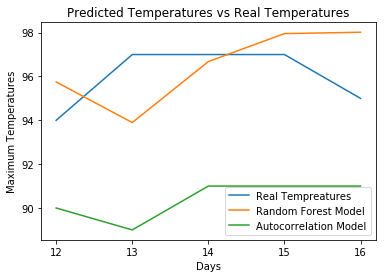

In [33]:
N = 5
old_algorithm = np.array([90, 89, 91, 91, 91])
real_tmax = np.array([94, 97, 97, 97, 95])
xdays = np.array([12, 13, 14, 15, 16])
ind = np.arange(N)

plt.title('Predicted Temperatures vs Real Temperatures')
plt.ylabel('Maximum Temperatures')
plt.xlabel('Days')
p1 = plt.plot(real_tmax)
p2 = plt.plot(predicted_array)
p3 = plt.plot(old_algorithm)
plt.legend((p1[0], p2[0], p3[0]), ('Real Tempreatures', 'Random Forest Model', 'Autocorrelation Model'))
plt.xticks(ind, xdays)

plt.show()

# Importance of Each Variable

In [34]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print "Varaiable:", " ", pair[0], "  ", "Importance:", " ", pair[1]

Varaiable:   TMIN    Importance:   0.77
Varaiable:   TMAX-1    Importance:   0.15
Varaiable:   PRCP    Importance:   0.02
Varaiable:   Day_01    Importance:   0.0
Varaiable:   Day_02    Importance:   0.0
Varaiable:   Day_03    Importance:   0.0
Varaiable:   Day_04    Importance:   0.0
Varaiable:   Day_05    Importance:   0.0
Varaiable:   Day_06    Importance:   0.0
Varaiable:   Day_07    Importance:   0.0
Varaiable:   Day_08    Importance:   0.0
Varaiable:   Day_09    Importance:   0.0
Varaiable:   Day_10    Importance:   0.0
Varaiable:   Day_11    Importance:   0.0
Varaiable:   Day_12    Importance:   0.0
Varaiable:   Day_13    Importance:   0.0
Varaiable:   Day_14    Importance:   0.0
Varaiable:   Day_15    Importance:   0.0
Varaiable:   Day_16    Importance:   0.0
Varaiable:   Day_17    Importance:   0.0
Varaiable:   Day_18    Importance:   0.0
Varaiable:   Day_19    Importance:   0.0
Varaiable:   Day_20    Importance:   0.0
Varaiable:   Day_21    Importance:   0.0
Varaiable:   Day_

In [70]:

data_list = list(shifted_data.columns)

np_features = np.array(shifted_data)

In [71]:

train_temps, test_temps, train_tmax, test_tmax = train_test_split(np_features, labels, test_size = 0.25, random_state = 42)

forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

forest.fit(train_temps, train_tmax)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [73]:
#MAE
forest_predictions = forest.predict(test_temps)

error = abs(predictions - test_tmax)

print('Mean Absolute Error:', round(np.mean(error), 2), 'degrees.')

('Mean Absolute Error:', 4.44, 'degrees.')


In [77]:
#accuracy
MAPE = 100 * (error / test_tmax)

accuracy_percent = 100 - np.mean(MAPE)
print('Accuracy:', round(accuracy_percent, 2), '%.')

('Accuracy:', 92.72, '%.')


# Convert to CoreML

In [80]:
coreml_model = coremltools.converters.sklearn.convert(forest, input_features=["Maximum Temp", "Precipitation", "Minimum Temp" ], output_feature_names="Temperature")
coreml_model.author = 'Ravi Wijeratne'
coreml_model.license = 'Unknown'
coreml_model.short_description = 'Predicts weather using Random Forest'
coreml_model.save("WeatherRF.mlmodel")